# House price predictions

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement 
ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much
more influences price negotiations than the number of bedrooms or a white-picket fence.


Predict the sales price for each house. 
For each Id in the test set, you must predict the value of the SalePrice variable. 

# Step 1 - Load the Dataset

In [89]:
#Import necessary libraries
import pandas as pd
import numpy as np

#Load the data and have a look at the sample
house_data = pd.read_csv("House_price_data.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Step 2 - Data Cleaning

In [90]:
# get the number of missing data points per column
house_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [91]:
#Drop NA values
house_data_nadrop = house_data.dropna(axis=1)
house_data_nadrop.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [92]:
# how much data did we lose?
print("Columns in original dataset: %d \n" % house_data.shape[1])
print("Columns with na's dropped: %d" % house_data_nadrop.shape[1])

Columns in original dataset: 81 

Columns with na's dropped: 62


Need to check if have any object type values in the dataset. You will get an error if you try to plug 
these variables into most machine learning models in Python without "encoding" them first. 

In [93]:
#Check object type value
house_data_nadrop.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
ExterQual        object
ExterCond        object
Foundation       object
BsmtFinSF1        int64
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
                  ...  
CentralAir       object
1stFlrSF          int64
2ndFlrSF          int64
LowQualFinSF      int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr    

Looks like we have got quiet few Object type features. 
Looking at the data description it doesn't seem they are worth keeping in the file for predictions.

In [94]:
house_data_nadrop = house_data_nadrop.select_dtypes(exclude=['object'])

In [95]:
#A lot object type values, let encode these categorial data
#house_data_nadrop = pd.get_dummies(house_data_nadrop)
#house_data_nadrop.head(10)

In [96]:
house_data_nadrop.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Step3 - Prepare data for modelling

Seperate features and target values.

In [57]:
#Select SalePrice and store into target variable
target = house_data_nadrop['SalePrice']

#drop Saleprice and store rest of the data to features
features = house_data_nadrop.drop('SalePrice', axis = 1)

#Drop Id as we do not need it for modelling purpose
features = features.drop(['Id'], axis = 1)

In [99]:
#Split the data into train and validation
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

# Step4 - Data modelling

Select a model according to your requirement or choice and fit the train data.
Once fit, predict new values for house price 

In [100]:
from sklearn.ensemble import RandomForestRegressor

#create the model
regressor_model = RandomForestRegressor(random_state=0)

#fit the model
regressor_model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor_model.predict(X_test)

# Step5- Check the accuracy of model

In [101]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8460683762222239

# Is the model good enough? 

Lets's check the data distribution. 

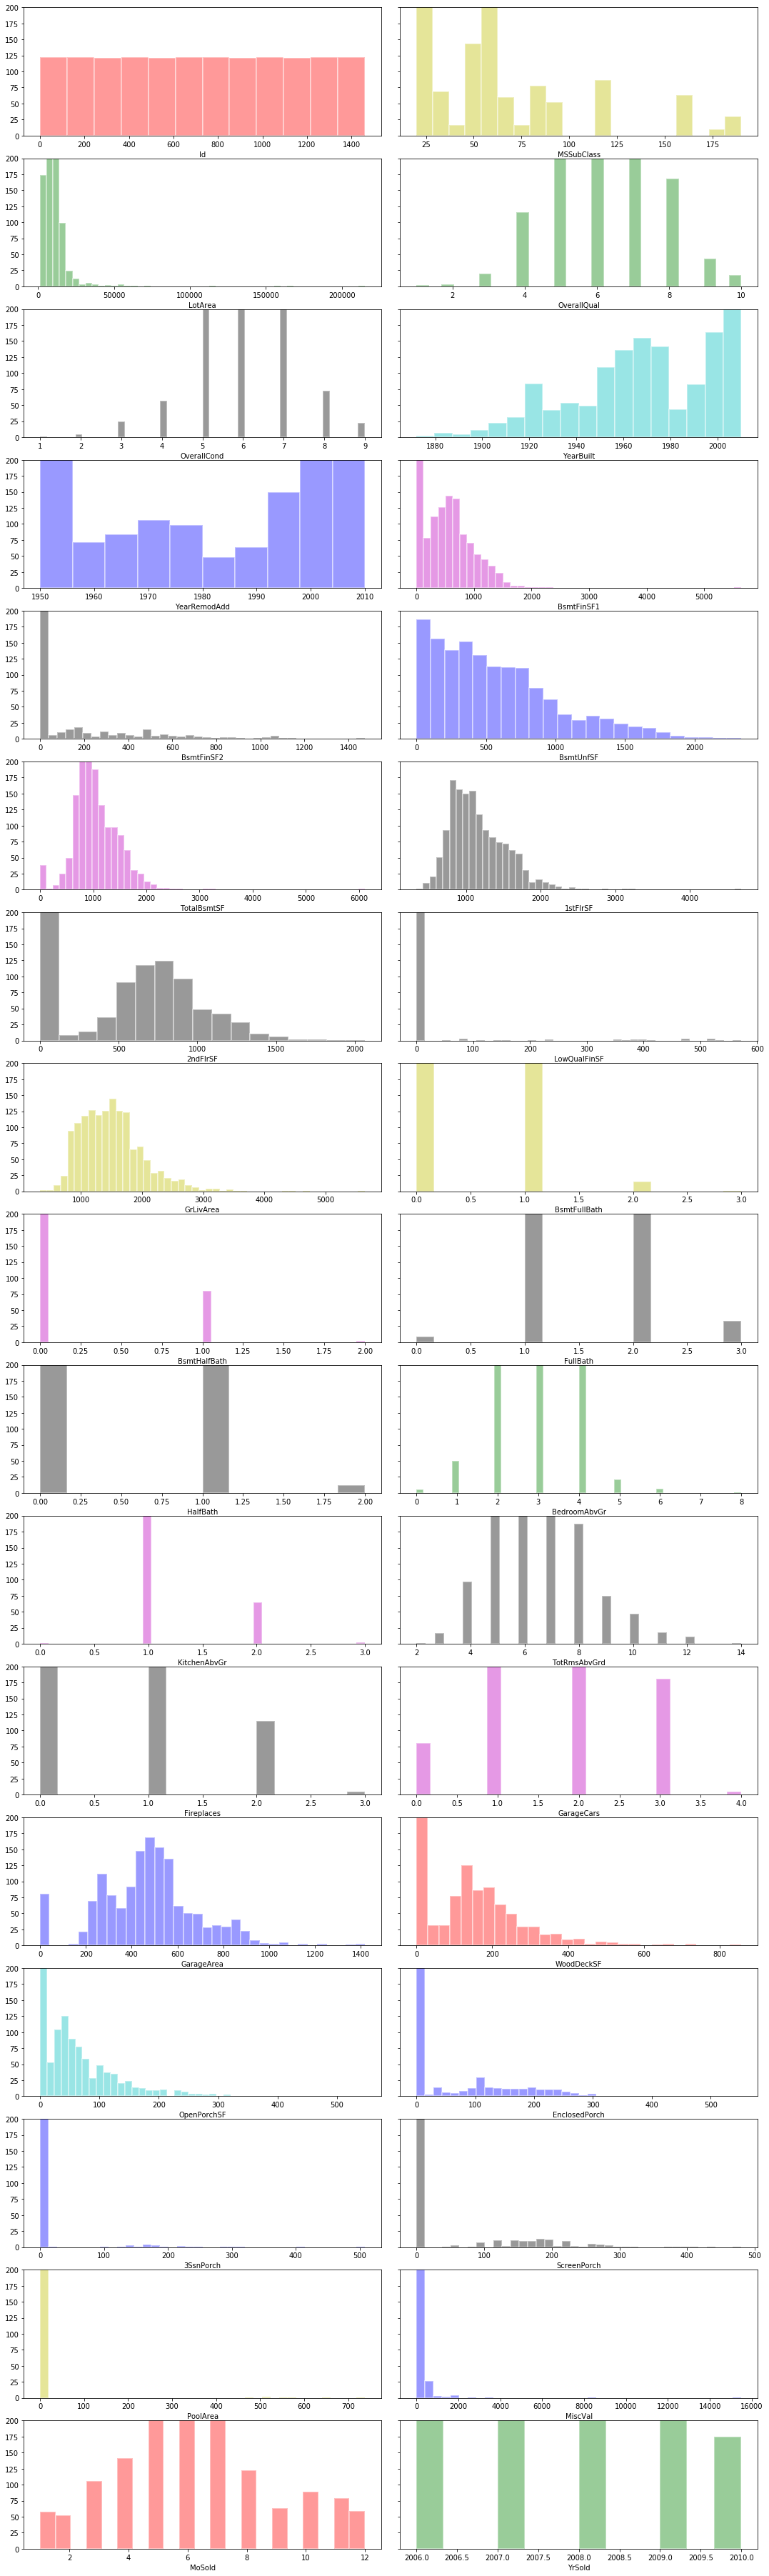

In [71]:
import seaborn as sns
colors = np.array('b g r c m y k'.split()) #Different colors for plotting

fig,axes = plt.subplots(nrows =17,ncols=2, sharey=True,figsize = (15,50))
plt.tight_layout()
row = 0
iteration = 0
for j in range(0,len(house_data_nadrop.columns[:-1])):
    iteration+=1
    if(j%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(house_data_nadrop[house_data_nadrop.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),
                 color = np.random.choice(colors) ,ax=axes[row][k])
    if(iteration%2==0):
        row+=1
        plt.ylim(0,200)    

Looks like data is not normally distributed. Should we try and normalize the data? or standardize it?

Is there any correlation between features?

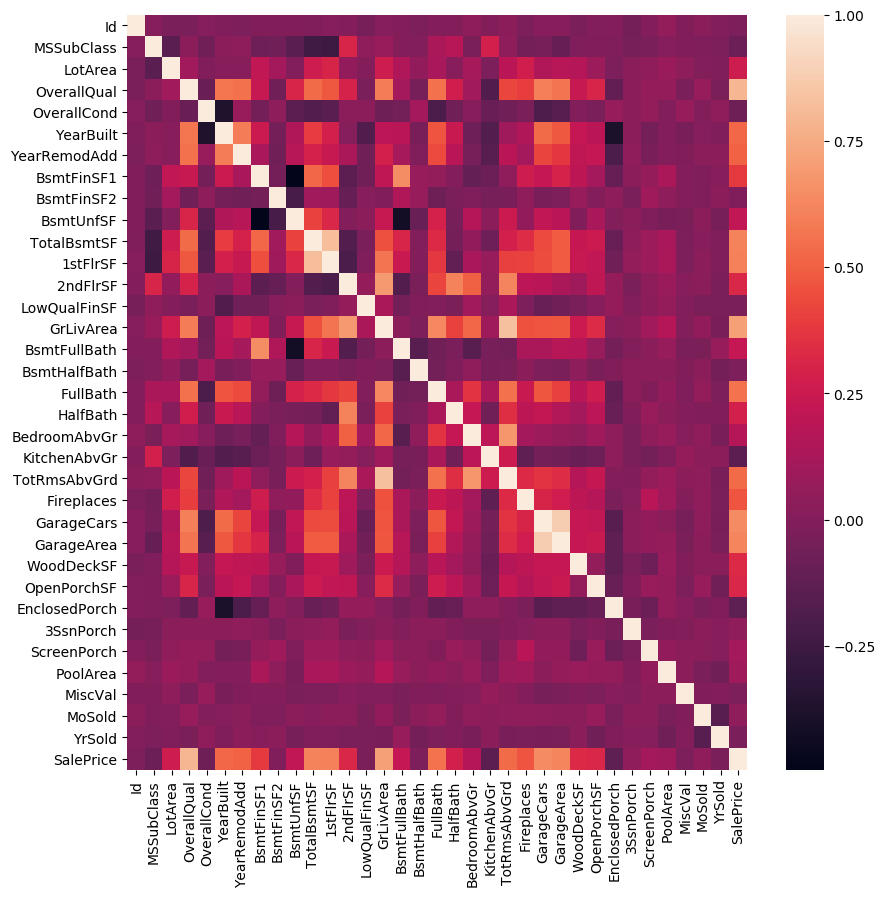

In [74]:
plt.figure(figsize= (10,10), dpi=100)
sns.heatmap(house_data_nadrop.corr())

From the above correlation plot it can be seen that Saleprice has strong realationship with - 
GarageArea, GarageCars, GRLivArea, TotalBsmtSF, 1stFlrSF, YearBuilt and OverallQual.

Should we try and use only these features to predict the prices?

In [112]:
#Select SalePrice and store into target variable
target = house_data_nadrop['SalePrice']

#drop Saleprice and store rest of the data to features
features = house_data_nadrop[['GrLivArea', '1stFlrSF', 'YearBuilt', 'OverallQual']].copy()

features 

,GrLivArea,1stFlrSF,YearBuilt,OverallQual
0,1710,856,2003,7
1,1262,1262,1976,6
2,1786,920,2001,7
3,1717,961,1915,7
4,2198,1145,2000,8
5,1362,796,1993,5
6,1694,1694,2004,8
7,2090,1107,1973,7
8,1774,1022,1931,7
9,1077,1077,1939,5


In [113]:
#Split the data into train and validation
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [114]:
from sklearn.ensemble import RandomForestRegressor

#create the model
regressor_model = RandomForestRegressor(random_state=0)

#fit the model
regressor_model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor_model.predict(X_test)

In [115]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8298034405771517

No changes in r2 score, we might just stick to previous data.

Now let's make prediction for test data and prepare CSV file

In [116]:
#Load the data and have a look at the sample
test_data = pd.read_csv("test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [111]:
# get the number of missing data points per column
#test_data.isnull().sum()

In [117]:
#Drop NA values
test_data_nadrop = test_data.dropna(axis=1)
test_data_nadrop.head()

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,140,0,0,0,120,0,0,6,2010,Normal
1,1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,393,36,0,0,0,0,12500,6,2010,Normal
2,1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,212,34,0,0,0,0,0,3,2010,Normal
3,1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,360,36,0,0,0,0,0,6,2010,Normal
4,1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,0,82,0,0,144,0,0,1,2010,Normal


In [118]:
test_data_nadrop.columns
 

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleCondition'],
      dtype='object')

In [119]:
features = test_data_nadrop[['GrLivArea', '1stFlrSF', 'YearBuilt', 'OverallQual']].copy()

features 

,GrLivArea,1stFlrSF,YearBuilt,OverallQual
0,896,896,1961,5
1,1329,1329,1958,6
2,1629,928,1997,5
3,1604,926,1998,6
4,1280,1280,1992,8
5,1655,763,1993,6
6,1187,1187,1992,6
7,1465,789,1998,6
8,1341,1341,1990,7
9,882,882,1970,4


In [120]:
test_pred = regressor_model.predict(features)

In [121]:
test_pred

array([119850.        , 150750.        , 154514.        , ...,
       132925.        , 115123.33333333, 244066.        ])

In [127]:
columns = ['Id', 'SalePrice']
dataframe = pd.DataFrame(columns=columns)

In [128]:
dataframe["Id"] = test_data_nadrop["Id"]
dataframe["SalePrice"] = test_pred

In [130]:
dataframe.head()

,Id,SalePrice
0,1461,119850.0
1,1462,150750.0
2,1463,154514.0
3,1464,178200.0
4,1465,225850.0


In [132]:
dataframe.to_csv('submission.csv',index=False)

Submitted this file to Kaggle - didn't get very good rank. 
May be we need to normalize or standardize our data.

In [9]:
#Import necessary libraries
import pandas as pd
import numpy as np

#Load the train data and have a look at the sample
house_data_train = pd.read_csv("House_price_data.csv")


#Load the test data and have a look at the sample
house_data_test = pd.read_csv("House_price_test_data.csv")
print(house_data_test.head())
print(house_data_train.head())

# get the number of missing data points per column
print(house_data_train.isnull().sum())
print(house_data_test.isnull().sum())

#Drop NA values
#house_data_train = house_data_train.dropna(axis=1)
#house_data_test = house_data_test.dropna(axis=1)

#house_data_train = pd.get_dummies(house_data_train)
#house_data_test = pd.get_dummies(house_data_test)

target = house_data_train['SalePrice']

#drop Saleprice and store rest of the data to features
features = house_data_train[['GrLivArea', '1stFlrSF', 'YearBuilt', 'OverallQual']].copy()
#features = house_data_train.drop('SalePrice', axis = 1)


from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
#features = pd.get_dummies(features)
features = imp.fit_transform(features)
house_data_test = pd.get_dummies(house_data_test)
house_data_test = imp.fit_transform(house_data_test)

#print(house_data_train.isnull().sum())

#house_data_nadrop.head(10)
#Select SalePrice and store into target variable
#target = house_data_train.iloc[:-1]

#drop Saleprice and store rest of the data to features
#features = house_data_train[['GrLivArea', '1stFlrSF', 'YearBuilt', 'OverallQual']].copy()
#features = house_data_train.drop('SalePrice', axis = 1)


#house_data_test_f = house_data_test[['GrLivArea', '1stFlrSF', 'YearBuilt', 'OverallQual']].copy()

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(features)
scaler


scaler.mean_                                      


scaler.scale_                                       


features = scaler.transform(features) 
features


test_f = scaler.transform(house_data_test)
#Split the data into train and validation
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

from sklearn.ensemble import RandomForestRegressor
#create the model
regressor_model = RandomForestRegressor()
#fit the model
regressor_model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor_model.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))


test_pred = regressor_model.predict(test_f)
columns = ['Id', 'SalePrice']
dataframe = pd.DataFrame(columns=columns)
dataframe["Id"] = house_data_test["Id"]
dataframe["SalePrice"] = test_pred
dataframe.to_csv('submission.csv',index=False)

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   
4         HLS    AllPub      ...               144        0    NaN    NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN   

ValueError: Number of features of the model must match the input. Model n_features is 289 and input n_features is 271 

After Standardization, the kaggle score improved.